In [298]:
import pandas as pd
import numpy as np

In [299]:
corona = pd.read_csv("../csv/corona.csv")

In [300]:
corona.drop(["Unnamed: 0"], axis="columns",inplace=True)

In [301]:
corona.columns = ['등록일시','사망자','확진자','게시글번호','기준일','기준시간','수정일시','누적의심자','누적확진률']

In [302]:
corona.sort_values(["등록일시"], inplace=True)

In [303]:
corona.reset_index(drop=True, inplace=True)

In [304]:
corona["일일확진자"] = corona["확진자"].diff()
corona["일일사망자"] = corona["사망자"].diff()
corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


In [305]:
## 결측치를 채우는 함수
## fillna(결측치에 들어갈 값)
corona["일일확진자"] = corona["일일확진자"].fillna(0)
corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


In [306]:
corona

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN,12039.0,9.0
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN,9834.0,20.0
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN,5022.0,21.0
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,6172.0,20.0


In [307]:
## fillna(옵션)
## mathod 속성 => ffill, bfill
## fill 채우다 라는 의미, f:front, b:back
## ffill -> 전의 값으로 채운다
## bfill -> 후의 값으로 채운다.
## 누적의심자 컬럼의 값들을 fillna(mathod='bfill')

corona["누적의심자"].fillna(method='bfill')

0      210144.0
1      222395.0
2      234998.0
3      248647.0
4      261335.0
         ...   
815         NaN
816         NaN
817         NaN
818         NaN
819         NaN
Name: 누적의심자, Length: 820, dtype: float64

In [308]:
corona["누적의심자"].fillna(method="ffill")

0        210144.0
1        222395.0
2        234998.0
3        248647.0
4        261335.0
          ...    
815    21518073.0
816    21518073.0
817    21518073.0
818    21518073.0
819    21518073.0
Name: 누적의심자, Length: 820, dtype: float64

In [309]:
## 누적확진률에 결측치의 값을 누적확률의 평균을 채운다

corona["누적확진률"].fillna(corona["누적확진률"].mean())

0      3.919308
1      3.804175
2      3.621744
3      3.458499
4      3.318000
         ...   
815    1.556435
816    1.556435
817    1.556435
818    1.556435
819    1.556435
Name: 누적확진률, Length: 820, dtype: float64

In [310]:
## fillte 기능
## query()

corona.query("일일확진자 < 0")

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0


In [311]:
## 인덱스 350 390까지의 데이터를 출력
## loc()

corona.loc[444:448,:]

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
444,2021-05-29 00:00:00.000,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,533.0,5.0
445,2021-05-30 00:00:00.0,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,910.0,8.0
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0
447,2021-06-01 00:00:00.000,1963,140796,499,20210601,00:00,2021-10-07 10:30:51.51,9798400.0,1.455890,889.0,6.0
448,2021-06-02 00:00:00.000,1965,141473,500,20210602,00:00,2021-10-07 10:30:51.51,9834348.0,1.457668,677.0,2.0


In [312]:
## lambda 함수 파생변수
## 일반 def 함수 파생변수
## 누적확진률 컬럼에서 누적확진률의 평균보다 높으면 Highe 낮으면 Low

corona["누적확진률"].fillna(corona["누적확진률"].mean(),inplace=True)


In [313]:
# lambda 매개변수 : 표현식
corona["H/L"] = corona["누적확진률"].apply(lambda x : "High" if (x > corona["누적확진률"].mean())else "Low")
corona.head()

corona["H/L"].value_counts()

Low     421
High    399
Name: H/L, dtype: int64

In [314]:
## apply 일반 함수
## 함수 생성
## 매개변수 1개 매개변수의 값이 누적확진률의 평균보다 높으면 High return
## 조건식이 거직이면 Low return

def HL(x):
    if x > corona["누적확진률"].mean():
        return "High"
    else:
        return "Low"

corona["누적확진률"].apply(HL)

0      High
1      High
2      High
3      High
4      High
       ... 
815    High
816    High
817    High
818    High
819    High
Name: 누적확진률, Length: 820, dtype: object

In [315]:
## 요일이라는 파생변수 생성
## 등록일시 datetime 변경
## datetime 기준으로 요일을 출력

corona["등록일시"] = pd.to_datetime(corona["등록일시"])

In [316]:
# dt.weekday를 사용하면 요일이 숫자로 표시
## 0 -> d월 , 6->일
corona["요일"] = corona["등록일시"].dt.weekday
corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L,요일
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN,High,1
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,2
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High,3
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High,4
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High,5


In [317]:
## apply 함수를 이용해서 숫자로 표시되어있는 요일 컬럼을
## 한글로 변경

def change_week(x):
    if x == 0:
        return "월"
    elif x == 1:
        return "화"
    elif x == 2:
        return "수"
    elif x == 3:
        return "목"
    elif x == 4:
        return "금"
    elif x == 5:
        return "토"
    else :
        return "일"

corona["요일"] = corona["요일"].apply(change_week)

In [318]:
corona["요일"].apply(lambda x : "월" if x == 0 else "화" if x == 1 else "수")

0      수
1      수
2      수
3      수
4      수
      ..
815    수
816    수
817    수
818    수
819    수
Name: 요일, Length: 820, dtype: object

In [319]:
### 요일별 코로나의 확진자수의 평균이 어떻게 표시가 되는가 (그룹으로 묶기)
## 그래프를 이용해서 출력

week_corona = corona.groupby("요일").mean()
week_corona["일일확진자"]

요일
금    22542.854701
목    25776.267241
수    26994.550847
월    14862.586207
일    20625.101695
토    22555.948718
화    21787.296610
Name: 일일확진자, dtype: float64

In [320]:
from matplotlib import font_manager, rc

In [321]:
import matplotlib.pyplot as plt

In [322]:
week_corona["일일확진자"].to_list()

[22542.8547008547,
 25776.26724137931,
 26994.550847457627,
 14862.586206896553,
 20625.101694915254,
 22555.94871794872,
 21787.29661016949]

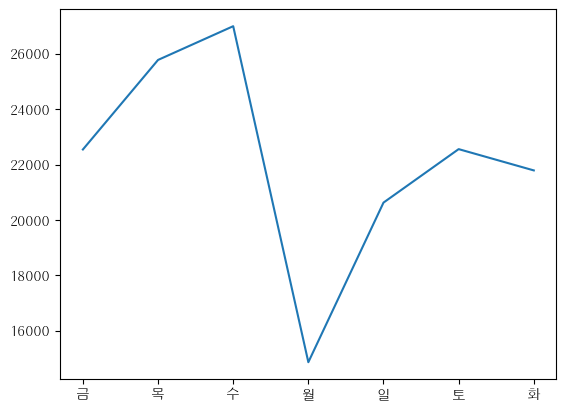

In [323]:
## x축의 값은  -> 요일
## y축의 값을  -> 평균 확진자의 수

x = week_corona.index
y = week_corona["일일확진자"].to_list()


file_path = "C:\Windows\Fonts\H2GPRM.TTF"
font = font_manager.FontProperties(fname=file_path).get_name()

rc('font',family=font)

plt.plot(x,y)
plt.show()

In [324]:
## yfinance 라이브러리
## 주식정보 받아올수 잇는 라이브러리
!pip install yfinance


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [325]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [326]:
yf.download("AAPL",start="2019-01-01")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.124847,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168354,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366505,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833588,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753826,219111200
...,...,...,...,...,...,...
2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78823500
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73314000


In [327]:
b = yf.download('006400.KS', start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


1. 각자 한종목의 데이터를 선택
3.  NaN값이 존재하면 시가 변환
4. 파생변수 등락폭 (종가 - 시가) 생성
5. 등락율(등락폭/시가 * 100) 파생상품 생성
6. 시가/종가 /등락폭/볼륨 데이터를 시각화하여 표시 subplot 4개의 그래프 생성

In [328]:
a=yf.download('036570.KS',start= '2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [329]:
a . isna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,False,False,False,False,False,False
2019-01-03,False,False,False,False,False,False
2019-01-04,False,False,False,False,False,False
2019-01-07,False,False,False,False,False,False
2019-01-08,False,False,False,False,False,False
...,...,...,...,...,...,...
2022-08-26,False,False,False,False,False,False
2022-08-29,False,False,False,False,False,False
2022-08-30,False,False,False,False,False,False


In [330]:
a["등락폭"] = a["Close"] - a["Open"]
a["등락율"] = a['등락폭'] / a['Open'] * 100
a.head()

,Open,High,Low,Close,Adj Close,Volume,등락폭,등락율
Date,,,,,,,,
2019-01-02,464500.0,472500.0,461000.0,467000.0,453965.46875,83710,2500.0,0.538213
2019-01-03,467000.0,467000.0,450500.0,454500.0,441814.34375,86434,-12500.0,-2.676660
2019-01-04,455500.0,468000.0,455000.0,464000.0,451049.21875,85521,8500.0,1.866081
2019-01-07,460000.0,476500.0,460000.0,472500.0,459311.96875,99745,12500.0,2.717391
2019-01-08,476000.0,477500.0,462500.0,469000.0,455909.62500,59862,-7000.0,-1.470588


In [331]:
import matplotlib.pyplot as plt

In [332]:



a = a["Open"].to_list()
b = a["Close"].to_list()
c = a["등락율"].to_list()


plt.subplot(3,1,1)
plt.plot(a)
plt.subplot(3,1,2)
plt.plot(b)
plt.subplot(3,1,3)
plt.plot(c)
plt.show()


TypeError: list indices must be integers or slices, not str

In [ ]:
## 회사 선택
amzn = yf.download("AMZN", start="2019-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
amzn[["Open","Close","High","Low"]] = amzn[["Open", "Close","High","Low"]].round(2)
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,75.54,76.04,74.35,75.10,75.098503,139090000
2019-01-02,73.26,77.67,73.05,76.96,76.956497,159662000
2019-01-03,76.00,76.90,74.86,75.01,75.014000,139512000
2019-01-04,76.50,79.70,75.92,78.77,78.769501,183652000
2019-01-07,80.12,81.73,79.46,81.48,81.475502,159864000


In [ ]:
amzn["등락폭"] = amzn["Close"] - amzn["Open"] 
amzn["등락율"] = amzn["등락폭"] / amzn["Open"] * 100
amzn.head() 

,Open,High,Low,Close,Adj Close,Volume,등락폭,등락율
Date,,,,,,,,
2018-12-31,75.54,76.04,74.35,75.10,75.098503,139090000,-0.44,-0.582473
2019-01-02,73.26,77.67,73.05,76.96,76.956497,159662000,3.70,5.050505
2019-01-03,76.00,76.90,74.86,75.01,75.014000,139512000,-0.99,-1.302632
2019-01-04,76.50,79.70,75.92,78.77,78.769501,183652000,2.27,2.967320
2019-01-07,80.12,81.73,79.46,81.48,81.475502,159864000,1.36,1.697454


In [ ]:
## 시각화
import matplotlib.pyplot as plt

c:\Users\tjddlf132\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


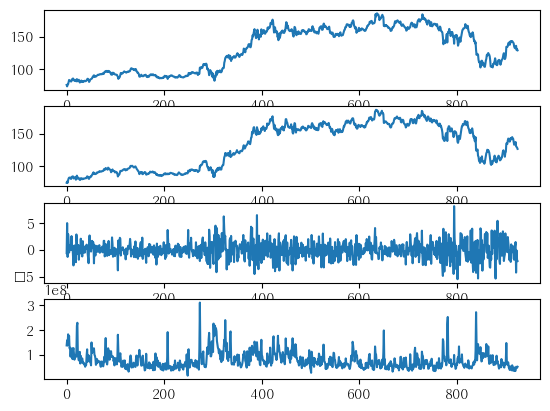

In [ ]:
a = amzn["Open"].to_list()
b = amzn["Close"].to_list()
c = amzn["등락율"].to_list()
d = amzn["Volume"].to_list()

plt.subplot(4,1,1)
plt.plot(a)
plt.subplot(4,1,2)
plt.plot(b)
plt.subplot(4,1,3)
plt.plot(c)
plt.subplot(4,1,4)
plt.plot(d)
plt.show()

### uriage.csv
1. 파일 로드
2. purchase_date 컬럼을 시계열데이터 변경
3. item_name 컬럼의 값들을 다 대문자 변경
4. item_name 컬럼의 값들의 공백 다 삭제 (좌우 띄어쓰기 전부 삭제)
5. item_name 기준으로 오름차순 정렬
6. 인덱스 재지정
7. 결측치의 값을 확인

In [ ]:
pu = pd.read_csv("../csv/uriage.csv")
pu

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현
...,...,...,...,...
2994,2019-02-15 2:56,상품Y,2500.0,김정민
2995,2019-06-22 4:03,상품M,1300.0,김재원
2996,2019-03-29 11:14,상품Q,NaN,김지율
2997,2019-07-14 12:56,상품H,NaN,김승주


In [ ]:
pu_copy = pu.copy()

In [ ]:
pu_copy["purchase_date"] = pd.to_datetime(pu_copy["purchase_date"], format = '%Y-%m-%d %H:%S')

In [ ]:
pu_copy["purchase_date"]

0      2019-06-13 18:00:02
1      2019-07-13 13:00:05
2      2019-05-11 19:00:42
3      2019-02-12 23:00:40
4      2019-04-22 03:00:09
               ...        
2994   2019-02-15 02:00:56
2995   2019-06-22 04:00:03
2996   2019-03-29 11:00:14
2997   2019-07-14 12:00:56
2998   2019-07-21 00:00:31
Name: purchase_date, Length: 2999, dtype: datetime64[ns]

In [ ]:
pu_copy["item_name"] = pu_copy["item_name"].str.upper()
pu_copy.head()

,purchase_date,item_name,item_price,customer_name
0,2019-01-02 13:00:26,상 품 N,1400.0,김범준
1,2019-03-02 15:00:38,상품 E,500.0,김시율
2,2019-03-02 01:00:53,상품 M,1300.0,김동건
3,2019-03-04 16:00:39,상품 P,1600.0,김승윤
4,2019-05-03 01:00:15,상품 S,1900.0,김동현


In [ ]:
# 공백 띄어쓰기 삭제

# case1
pu_copy["item_name"] = pu_copy["item_name"].apply(lambda x: x.replace(" ",""))

# case2
def change(x):
    return x.replace(" ","")

pu_copy["item_name"] = pu_copy["item_name"].apply(change)

# case3
pu_copy["item_name"].str.replace(" ","")


0       상품N
1       상품E
2       상품M
3       상품P
4       상품S
       ... 
2994    상품S
2995    상품T
2996    상품V
2997    상품X
2998    상품Y
Name: item_name, Length: 2999, dtype: object

In [ ]:
#item_name 기준으로  오름차순 정렬
pu_copy.sort_values("item_name", ascending=True, inplace= True)

In [ ]:
pu_copy.reset_index(drop=True, inplace=True)

In [ ]:
pu_copy.isna().sum()

purchase_date      0
item_name          0
item_price       387
customer_name      0
dtype: int64

In [ ]:
import pandas as pd

In [ ]:
## 결측치의 값에 해당하는 item_name들의 item_print의 값으로 치환

fig_null = pu_copy["item_price"].isna()
fig_null

0       False
1       False
2       False
3       False
4       False
        ...  
2994    False
2995    False
2996    False
2997    False
2998    False
Name: item_price, Length: 2999, dtype: bool

In [ ]:
name_list = pu_copy.loc[fig_null,'item_name'].unique()

In [ ]:
## '~' 연산자 -> 부정
## ~False = True , ~True = False

pu_copy.loc[(~fig_null) &`` (pu_copy["item_name"]=="상품A"),'item_price'].max()

100.0

In [ ]:
for name in list(name_list):
    price = pu_copy.loc[(~fig_null) & (pu_copy["item_name"] == name), "item_price"].mean()
    pu_copy["item_price"].loc[(fig_null) & (pu_copy["item_name"] == name)] = price 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21392\451151344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pu_copy["item_price"].loc[(fig_null) & (pu_copy["item_name"] == name)] = price


###  dateframe 결합
1. 단순하게 행을 추가
2. 열을 추가(단순히 열을 추가 / 특정조건에 맞게 열을 추가) 

In [ ]:
# 행을 추가하는 방법

import pandas as pd

In [ ]:
df = pd.DataFrame({
    'S1':[1,2,3,4],
    'S2':[5,6,7,8]
})
df

,S1,S2
0,1,5
1,2,6
2,3,7
3,4,8


In [ ]:
df2 = pd.DataFrame([1,2])
df2

,0
0,1
1,2


### concat()
1. 데이터프레임을 결합하는 함수
2. axis 0,1 행을 추가, 열을 추가 지정(기본값은 행을 추가)
3. 단순하게 결합
4. ignore_index 속성 기본값이 false 인덱스의 값은 그대로 할 것인가 아니면 새로 재지정 할 것인가?


In [ ]:
pd.concat([df,df2],axis="rows",ignore_index=True)
pd.concat([df,df2]).reset_index(drop=True)

,S1,S2,0
0,1.0,5.0,NaN
1,2.0,6.0,NaN
2,3.0,7.0,NaN
3,4.0,8.0,NaN
4,NaN,NaN,1.0
5,NaN,NaN,2.0


In [ ]:
df3 = pd.DataFrame({
    "S1" : [1,3]

})
df3

,S1
0,1
1,3


### marge()
1. 데이터프레임을 결합 함수
2. 특정 조건을 만족해야 얼이 추가
3. on 속성 -> 조건
4. how 속성 => 기준이 되는 데이터프레임 선택 (left,right,inner,full)


In [336]:
df4 = pd.DataFrame({
    "id" : [1,2,3,4,5],
    "item" : ["a","b","a","a","b"]
})
df5 = pd.DataFrame({
    "id" : [1,4,5,2,3],
    "name" : ["kim","lee","park","choi","ha"]

})

In [337]:
#concat( )열추가
#merge() 열 추가
pd.concat([df5,df4],axis=1)

,id,name,id,item
0,1,kim,1,a
1,4,lee,2,b
2,5,park,3,a
3,2,choi,4,a
4,3,ha,5,b


In [338]:
pd.merge(df4,df5, on='id',how='inner')

,id,item,name
0,1,a,kim
1,2,b,choi
2,3,a,ha
3,4,a,lee
4,5,b,park


In [339]:
df6 = pd.DataFrame({
    "item" : ['a','b','c'],
    "item_price" : [100,500,1000]

})

In [340]:
pd.concat([df4,df6],axis=1)

,id,item,item,item_price
0,1,a,a,100.0
1,2,b,b,500.0
2,3,a,c,1000.0
3,4,a,NaN,NaN
4,5,b,NaN,NaN


In [343]:
pd.merge(df4,df6, on='item',how='left')

,id,item,item_price
0,1,a,100
1,2,b,500
2,3,a,100
3,4,a,100
4,5,b,500
